In [1]:
import sympy as sp
from sympy.core.numbers import pi
from IPython.display import display
from latex2sympy2 import latex2sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
tol = 1e-12
sp.init_printing()

Define Symbols

In [3]:
x, y, z, K, eps_0, c, h = sp.symbols('x y z K epsilon_0 c h')
a, b = sp.symbols('a b')

Create potential function for sympy

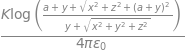

In [4]:
phi = (K/(4*pi*eps_0))*(sp.log((sp.sqrt(x**2+(y+a)**2 + z**2)+y+a)/(sp.sqrt(x**2+y**2+z**2)+y)))
display(phi)

Using mathpix, convert Janghyun's function from his powerpoint into latex, and then convert this into sympy. We are making the function two different ways to check we have it input correctly. Sympy displays equation in a not so clear way sometimes, but nothing we can do about it. 

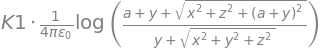

In [5]:
phi_latex = r"K\frac{1}{4 \pi \epsilon_0}\left[\ln \frac{\sqrt{x^2+(y+a)^2+z^2}+(y+a)}{\sqrt{x^2+y^2+z^2}+y}\right]"
phi_janghyun = latex2sympy(phi_latex)
display(phi_janghyun)

Check if both functions are the same, although I don't trust it so let's do another check later.

In [6]:
print(phi.equals(phi_janghyun)) 

True


Make a lambda function out of each with some simple constants so we can check equality numerically.

In [7]:
phi_simple = phi.subs({K:1, eps_0:1, pi:np.pi, a:1})
phi_janghyun_simple = phi_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})
 
phi_lambda_simple = sp.lambdify([x, y, z], phi_simple, 'numpy')
phi_janghyun_lambda_simple = sp.lambdify([x, y, z], phi_janghyun_simple, 'numpy')


Evaluate both functions at x, y, z = 2 and check equality against the tolerance.

In [8]:
x_eval, y_eval, z_eval = 2, 2, 2
print(np.abs(np.array(phi_lambda_simple(x_eval, y_eval, z_eval))-np.array(phi_janghyun_lambda_simple(x_eval, y_eval, z_eval))) < tol)

True


Differentiate our input function to find the E-Field.

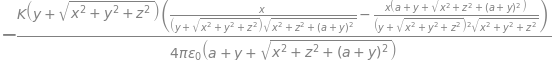

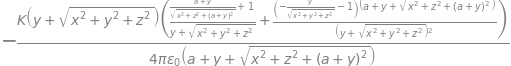

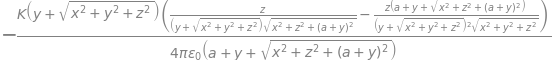

In [9]:
Ex = -1*phi.diff(x)
Ey = -1*phi.diff(y)
Ez = -1*phi.diff(z)

display(Ex, Ey, Ez)

Now convert Janghyuns's Efield math from the powerpoint into a sympy equation.

In [10]:
Ex_latex = r"$\frac{-K}{4 \pi \epsilon_0} x\left[\frac{1}{\sqrt{x^2+(y+a)^2+z^2}+(y+a)} \cdot \frac{1}{\sqrt{x^2+(y+a)^2+z^2}}-\frac{1}{\sqrt{x^2+y^2+z^2}+y} \cdot \frac{1}{\sqrt{x^2+y^2+z^2}}\right]$"
Ey_latex = r"$\frac{-K}{4 \pi \epsilon_0}\left[\frac{1}{\sqrt{x^2+(y+a)^2+z^2}+(y+a)} \cdot\left(\frac{y+a}{\sqrt{x^2+(y+a)^2+z^2}}+1\right)-\frac{1}{\sqrt{x^2+y^2+z^2}+y} \cdot\left(\frac{y}{\sqrt{x^2+y^2+z^2}}+1\right)\right]$"
Ez_latex = r"$\frac{-K}{4 \pi \epsilon_0} z\left[\frac{1}{\sqrt{x^2+(y+a)^2+z^2}+(y+a)} \cdot \frac{1}{\sqrt{x^2+(y+a)^2+z^2}}-\frac{1}{\sqrt{x^2+y^2+z^2}+y} \cdot \frac{1}{\sqrt{x^2+y^2+z^2}}\right]$"

Display Janghyun's E-field. Again sympy does not display it in such a nice way. 

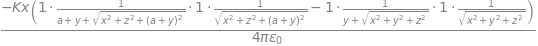

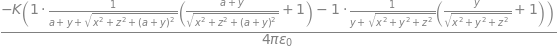

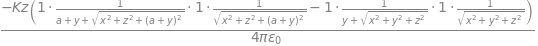

In [11]:
Ex_janghyun = latex2sympy(Ex_latex)
Ey_janghyun = latex2sympy(Ey_latex)
Ez_janghyun = latex2sympy(Ez_latex)
display(Ex_janghyun, Ey_janghyun, Ez_janghyun)

Check equation equality again with sympy:

In [12]:
#print(Ex.equals(Ex_janghyun))
#print(Ey.equals(Ey_janghyun))
#print(Ez.equals(Ez_janghyun))

 and again don't trust it so do it numerically:

In [13]:
Ex_simple = Ex.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ey_simple = Ey.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ez_simple = Ez.subs({K:1, eps_0:1, pi:np.pi, a:1})

E_lambda_simple = sp.lambdify([x, y, z], [Ex_simple, Ey_simple, Ez_simple], 'numpy')

Ex_janghyun_simple = Ex_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ey_janghyun_simple = Ey_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ez_janghyun_simple = Ez_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})

E_janghyun_lambda_simple = sp.lambdify([x, y, z], [Ex_janghyun_simple, Ey_janghyun_simple, Ez_janghyun_simple], 'numpy')

print(np.abs(np.array(E_lambda_simple(x_eval, y_eval, z_eval))-np.array(E_janghyun_lambda_simple(x_eval, y_eval, z_eval))) < tol)

[ True  True  True]


Ok, so now we probably have the wire potential implemented correctly, let's plot the potential to view it.

In [14]:
x_line = np.linspace(-1, 1, 1000)
y_line = np.linspace(-1, 1, 1000)
x_grid, y_grid = np.meshgrid(x_line, y_line)

Text(0, 0.5, 'y')

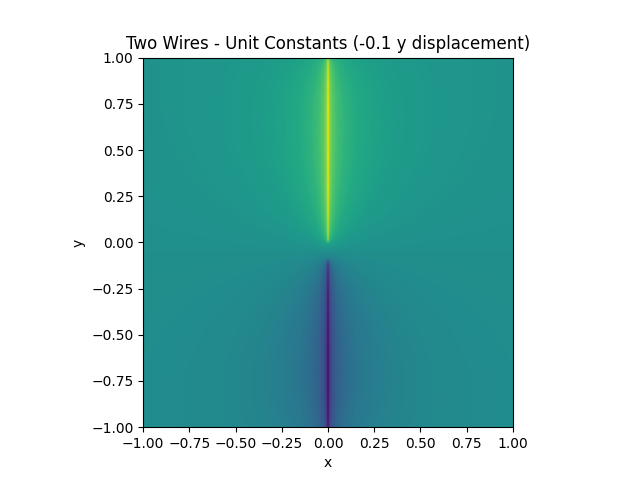

In [15]:
plt.figure()
plt.imshow(phi_lambda_simple(x_grid, y_grid, 0)-phi_lambda_simple(-(x_grid-0), -(y_grid-0.1), 0), extent = [-1, 1, -1, 1])
plt.title('Two Wires - Unit Constants (-0.1 y displacement)')
plt.xlabel('x')
plt.ylabel('y')

Now we need to make a function that creates our wire potential and E-Field for specific parameters. Here we use a slightly modified version of the potential from principles of electron optics Vol. 1, as Hawkes way should account for relativistic effects without the need to update the gamma factor explicitly. See chapter 2, relativistic kinematics for more information from Vol 1, 2017 edition of principles of electron optics.. 

$\hat{\Phi}\left(\boldsymbol{r}, \Phi_0\right)=\left(\Phi_0+\Phi(\boldsymbol{r})\right)\left\{1+\varepsilon\left(\Phi_0+\Phi(\boldsymbol{r})\right)\right\} \geq 0$ (Equation 2.18)

where $\hat{\Phi}\left(\boldsymbol{r}\right)$ is our potential function, $\Phi_0$ is a function that describes the distribution of electron energies from the gun (we set this to zero because we aren't accounting for chromatic aberration now), and $\varepsilon:=\frac{e}{2 m_0 c^2}=0.9785 \mathrm{MV}^{-1}$ (Equation 2.16).

With this definition, we can also define $\gamma$ in terms of the potential: $\gamma=\sqrt{1+4 \varepsilon \hat{\Phi}}=1+2 \varepsilon\left\{\Phi(\mathbf{r})+\Phi_0\right\}$ (Equation 2.21).

When Hawkes derives the electron equations of motion (Equation 3.22), using 2.18 as his potential, updates to $\gamma$ are implicitly included in changes to the potential by writing our potential as $\hat{\Phi}$. 

$\begin{aligned} x^{\prime \prime} & =\frac{\rho^2}{2 \hat{\Phi}}\left(\frac{\partial \hat{\Phi}}{\partial x}-x^{\prime} \frac{\partial \hat{\Phi}}{\partial z}\right) \\ y^{\prime \prime} & =\frac{\rho^2}{2 \hat{\Phi}}\left(\frac{\partial \hat{\Phi}}{\partial y}-y^{\prime} \frac{\partial \hat{\Phi}}{\partial z}\right)\end{aligned}$

Solving this numerically should automatically give us relativistic electron trajectories, where the electron's energy, velocity and wavelength update correctly as it sees the potential from the wires. 

TEMGYMAdvanced previously did not implement this, as I wasn't quite aware of this method until I started to look at this again last week. 

Create function to make the wire potential. 

In [18]:
def make_double_wire_potential_and_efield(phi, phi_0, x, y, z, K, eps_0, eps, a,
                                          x_displacement, y_displacement, K_val,
                                          eps_0_val, length):
    
    #Substitute correct constants into the wire potential
    phi = phi.subs({K: K_val, eps_0: eps_0_val, pi: np.pi, a: length})
    
    #Create the top and bottom wire
    phi_top_wire = phi
    phi_bottom_wire = phi.subs({x:-(x-x_displacement), y:-(y-y_displacement)})

    #Make the first wire positively charged, and the second negatively charged
    phi_wires = phi_top_wire - phi_bottom_wire
    
    #Create the phi_hat version of this function for refractive index calculation
    phi_hat_wires = (phi_wires)*(1+eps*(phi_wires))
    
    #Include the initial potential of the electron from the gun. 
    phi_wires_electron = phi_0 - phi_wires
    
    #Create phi_hat function from hawkes (2.18)
    phi_hat_wires_electron = (phi_wires_electron)*(1+eps*(phi_wires_electron))
    
    #Get E field function. Notive there is no negative sign, as the way hawkes uses phi_hat, there is no minus before it (Equation 3.22).
    dphi_hat_wires_electron_dx = phi_hat_wires_electron.diff(x)
    dphi_hat_wires_electron_dy = phi_hat_wires_electron.diff(y)
    dphi_hat_wires_electron_dz = phi_hat_wires_electron.diff(z)

    phi_wires_lambda = sp.lambdify([x, y, z], phi_wires, 'numpy')
    phi_hat_wires_lambda = sp.lambdify([x, y, z], phi_hat_wires, 'numpy')
    phi_hat_wires_electron_lambda = sp.lambdify([x, y, z], phi_hat_wires_electron, 'numpy')
    dphi_hat_wires_electron_lambda = sp.lambdify([x, y, z], [dphi_hat_wires_electron_dx, dphi_hat_wires_electron_dy, dphi_hat_wires_electron_dz], 'numpy')
    
    return phi_hat_wires_electron_lambda, dphi_hat_wires_electron_lambda, phi_wires_lambda, phi_hat_wires_lambda

def make_double_wire_potential_and_efield_pozzi(phi, phi_0, x, y, z, K, K_val, c, c_val, h, h_val, eps_0, eps_0_val, eps):
    
    #Substitute correct constants into the wire potential
    phi_wires = phi.subs({K: K_val, eps_0: eps_0_val, pi: np.pi, c:c_val, h:h_val})

    #Create the phi_hat version of this function for refractive index calculation
    phi_hat_wires = (phi_wires)*(1+eps*(phi_wires))
    
    #Include the initial potential of the electron from the gun. 
    phi_wires_electron = phi_0 - phi_wires
    
    #Create phi_hat function from hawkes (2.18)
    phi_hat_wires_electron = (phi_wires_electron)*(1+eps*(phi_wires_electron))
    
    #Get E field function. Notive there is no negative sign, as the way hawkes uses phi_hat, there is no minus before it (Equation 3.22).
    dphi_hat_wires_electron_dx = phi_hat_wires_electron.diff(x)
    dphi_hat_wires_electron_dy = phi_hat_wires_electron.diff(y)
    dphi_hat_wires_electron_dz = phi_hat_wires_electron.diff(z)

    phi_wires_lambda = sp.lambdify([x, y, z], phi_wires, 'numpy')
    phi_hat_wires_lambda = sp.lambdify([x, y, z], phi_hat_wires, 'numpy')
    phi_hat_wires_electron_lambda = sp.lambdify([x, y, z], phi_hat_wires_electron, 'numpy')
    dphi_hat_wires_electron_lambda = sp.lambdify([x, y, z], [dphi_hat_wires_electron_dx, dphi_hat_wires_electron_dy, dphi_hat_wires_electron_dz], 'numpy')
    
    return phi_hat_wires_electron_lambda, dphi_hat_wires_electron_lambda, phi_wires_lambda, phi_hat_wires_lambda

Define some important constants such as the initial potential, velocity gamma factor.

In [39]:
e = -1.60217662e-19 #unit C
m = 9.10938356e-31 #unit kg
c_l = 2.99792458e8 #unit m/s
eps_0_val = 8.85418782e-12 #permittivity unit F/m

phi_0 = 1e5 #unit V
v_0 = c_l*(1-(1-(e*phi_0)/(m*(c_l**2)))**(-2))**(1/2) #unit m/s
eta = (abs(e)/(2*m))**(1/2) #Constant from Hawkes
gamma = 1/(1-(v_0**2/c_l**2))**(1/2) #Gamma factor
eps = abs(e)/(2*m*c_l**2) #eps as defined in Hawkes, different from the permittivity of free space. 

Let's check that the relativistic velocity of the electron as defined by Hawkes matches v_0 above (the usual way to calculate relativistic velocity).

In [40]:
phi_hat = (phi_0)*(1+eps*(phi_0)) 
v_0_hawkes = 2*eta*(phi_hat/(1+4*eps*phi_hat))**(1/2)

print(v_0)
print(v_0_hawkes)

164352480.1574419
164352480.15744197


Let's check visually that the function we have created makes the same potential as what we created above.

In [21]:
phi_lambda, dphi_lambda, phi_wires_lambda, phi_hat_wires_lambda = make_double_wire_potential_and_efield(phi, phi_0, x, y, z, K, eps_0, eps, a, 0, 0.1, 1, 1, 1)

Text(0, 0.5, 'y')

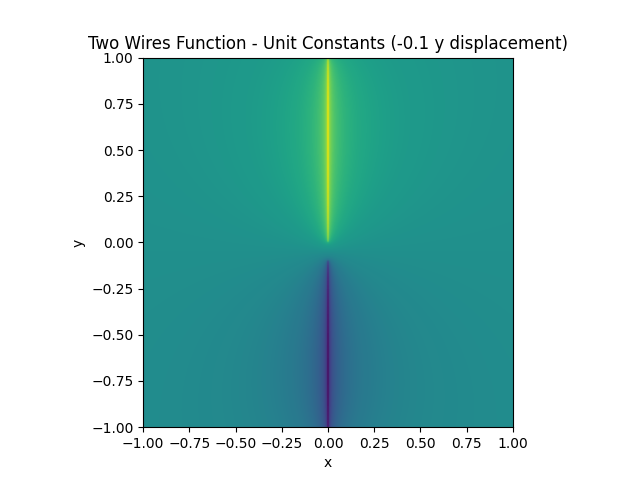

In [22]:
plt.figure()
plt.imshow(phi_wires_lambda(x_grid, y_grid, 0), extent = [-1, 1, -1, 1])
plt.title('Two Wires Function - Unit Constants (-0.1 y displacement)')
plt.xlabel('x')
plt.ylabel('y')

Create the actual potential as per the constants sent by Janghyun. I presume I should convert K to SI units? 

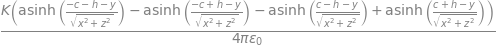

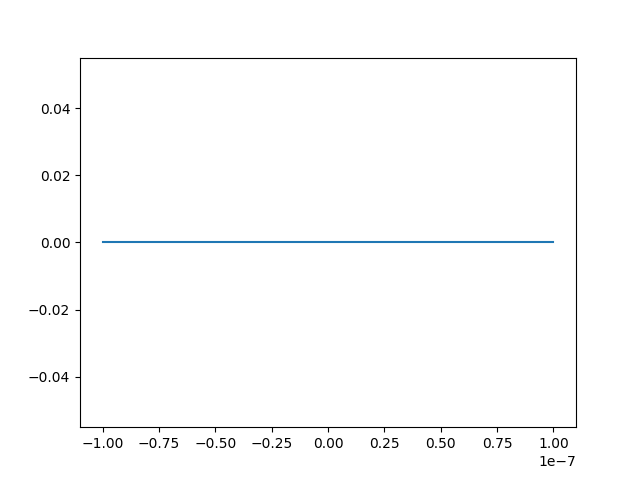

In [61]:
K_val = 3.31 #unit e/nm - convert to coulombs per m? 
K_val_SI = (3.31*abs(e))/1e-9 #C/m
y_displacement = 177e-9 #unit m
x_displacement = 0 #unit m
a_val = 1e-3 #unit m

phi_hat_lambda, dphi_hat_lambda, phi_wires_lambda, phi_hat_wires_lambda= make_double_wire_potential_and_efield(phi, phi_0, x, y, z, K, eps_0, eps, a, x_displacement, y_displacement, 
                                                                        K_val_SI, eps_0_val, a_val)

c_val = a_val/2
h_val = y_displacement

phi_pozzi = (K/(4*pi*eps_0))*((sp.asinh((c-(y-h))/sp.sqrt(x**2+z**2)))-(sp.asinh((-c-(y-h))/sp.sqrt(x**2+z**2)))+(sp.asinh((-c-(y+h))/sp.sqrt(x**2+z**2)))-(sp.asinh((c-(y+h))/sp.sqrt(x**2+z**2))))
display(phi_pozzi)
phi_hat_lambda_pozzi, dphi_hat_lambda_pozzi, phi_wires_lambda_pozzi, phi_hat_wires_lambda_pozzi = make_double_wire_potential_and_efield_pozzi(phi_pozzi, phi_0, x, y, z, K, K_val, c, c_val, h, h_val, eps_0, eps_0_val, eps)

phi_wires_lambda_pozzi(0,1e-9,1e-9)

plt.figure()
plt.plot(np.linspace(-100e-9, 100e-9, 100), phi_wires_lambda_pozzi(0,0,np.linspace(-100e-9, 100e-9, 100)))

Plot the potential from plan view (view of x, y plane), and side view (view of (z, y plane))

Text(0, 0.5, 'y (m)')

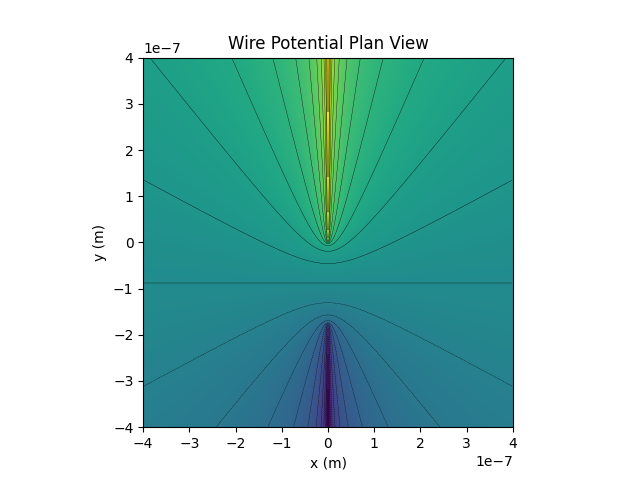

In [58]:
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_wires_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

Text(0, 0.5, 'y (m)')

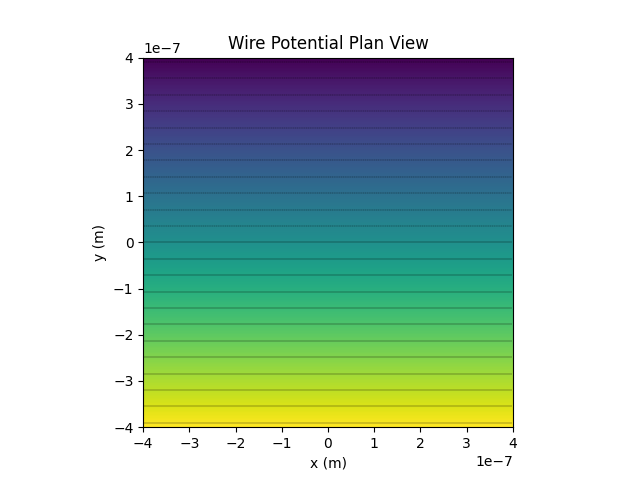

In [59]:
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_wires_lambda_pozzi(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

Plot sideview (I think this is correct, it should look the same as the plan view)

Text(0, 0.5, 'y (m)')

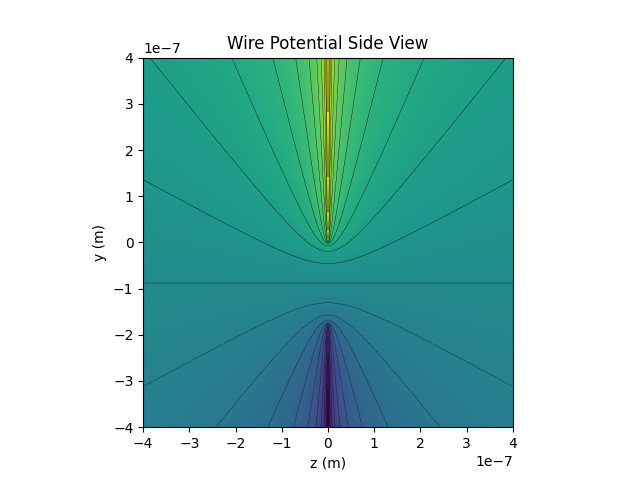

In [26]:
zy_figure, zy_ax = plt.subplots()
z_line, zstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_grid, z_grid = np.meshgrid(y_line, z_line)
x_grid = 0*np.ones(y_grid.shape)
potential_image = phi_wires_lambda(x_grid, z_grid, y_grid)
zy_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
zy_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent=[-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')

zy_ax.set_title('Wire Potential Side View')
zy_ax.set_xlabel('z (m)')
zy_ax.set_ylabel('y (m)')

Dormand prince 5/4 adaptive step size ODE solver

In [27]:
def odedopri(f,  x0,  y0,  x1,  tol,  hmax,  hmin,  maxiter, args=()):
    a21 = (1.0/5.0)
    a31 = (3.0/40.0)
    a32 = (9.0/40.0)
    a41 = (44.0/45.0)
    a42 = (-56.0/15.0)
    a43 = (32.0/9.0)
    a51 = (19372.0/6561.0)
    a52 = (-25360.0/2187.0)
    a53 = (64448.0/6561.0)
    a54 = (-212.0/729.0)
    a61 = (9017.0/3168.0)
    a62 = (-355.0/33.0)
    a63 = (46732.0/5247.0)
    a64 = (49.0/176.0)
    a65 = (-5103.0/18656.0)
    a71 = (35.0/384.0)
    a72 = (0.0)
    a73 = (500.0/1113.0)
    a74 = (125.0/192.0)
    a75 = (-2187.0/6784.0)
    a76 = (11.0/84.0)
    c2 = (1.0 / 5.0)
    c3 = (3.0 / 10.0)
    c4 = (4.0 / 5.0)
    c5 = (8.0 / 9.0)
    c6 = (1.0)
    c7 = (1.0)
    b1 = (35.0/384.0)
    b2 = (0.0)
    b3 = (500.0/1113.0)
    b4 = (125.0/192.0)
    b5 = (-2187.0/6784.0)
    b6 = (11.0/84.0)
    b7 = (0.0)
    b1p = (5179.0/57600.0)
    b2p = (0.0)
    b3p = (7571.0/16695.0)
    b4p = (393.0/640.0)
    b5p = (-92097.0/339200.0)
    b6p = (187.0/2100.0)
    b7p = (1.0/40.0)
    x = x0
    y = y0
    h = hmax
    X = np.zeros(maxiter)
    X[0] = x0
    Y = np.zeros((maxiter, len(y0)))
    Y[0] = y0
    
    #We need a special step counter because the ODE dormand prince 
    #method will do a step again with a smaller step size if the error is too large
    step = 1
    for i in range(maxiter):
       # /* Compute the function values */
       K1 = f(x,       y, *args)
       K2 = f(x + c2*h, y+h*(a21*K1), *args)
       K3 = f(x + c3*h, y+h*(a31*K1+a32*K2), *args)
       K4 = f(x + c4*h, y+h*(a41*K1+a42*K2+a43*K3), *args)
       K5 = f(x + c5*h, y+h*(a51*K1+a52*K2+a53*K3+a54*K4), *args)
       K6 = f(x + h, y+h*(a61*K1+a62*K2+a63*K3+a64*K4+a65*K5), *args)
       K7 = f(x + h, y+h*(a71*K1+a72*K2+a73*K3+a74*K4+a75*K5+a76*K6), *args)
       error = abs((b1-b1p)*K1+(b3-b3p)*K3+(b4-b4p)*K4+(b5-b5p)*K5 +
                   (b6-b6p)*K6+(b7-b7p)*K7)
       #Error in X controls tolerance
       error = max(error)
       # error control
       if error != 0.0:
           delta = 0.84 * pow(tol / error, (1.0/5.0))
       else:
           delta = np.inf
       if (error < tol):
          x = x + h
          X[step] = x
          y = y + h * (b1*K1+b3*K3+b4*K4+b5*K5+b6*K6)
          Y[step, :] = y
          step+=1
       if (delta <= 0.1):
          h = h * 0.1
       elif (delta >= 4.0):
          h = h * 4.0
       else:
          h = delta * h
       if (h > hmax):
          h = hmax
       if (x >= x1):
          print('reached end')
          break
       elif (x + h > x1):
          h = x1 - x
       elif (h < hmin):
          print('Below hmin')
          break
    return X, Y, step

Create the equation of motion ODE to solve

In [28]:
def trajectory_equation_of_motion(z, x, phi_hat_lambda, dphi_hat_lambda):
    
    p = np.sqrt(1+x[1]**2+x[3]**2) #obtain slope of ray
    phi_hat = phi_hat_lambda(x[0], x[2], z) #evaluate potential
    dphi_hat_x, dphi_hat_y, dphi_hat_z = dphi_hat_lambda(x[0], x[2], z) #evaluate the efield
    
    return np.array([x[1], (p**2)/(2*phi_hat)*(dphi_hat_x-x[1]*dphi_hat_z), x[3], (p**2)/(2*phi_hat)*(dphi_hat_y-x[3]*dphi_hat_z)]) #evaluate the velocities and accelerations, [vx, ax, vy, ay]

Set up initial conditions for ray tracing

In [29]:
x0 = np.array([0, 0, -y_displacement/2, 0]) #x, x', y, y'
z0 = -50e-6 #Initial z plane
zF = 50e-6 #Final z plane

Trace the electron through the potential

In [30]:
tol = 1e-10 #error tolerance in the calculation (error in force or velocity on one axis is no larger than tolerance)
max_step_size = 1e-5 #m
min_step_size = 1e-15 #m
z_out, x_out, steps = odedopri(trajectory_equation_of_motion,  z0,  x0,  zF,  tol ,  max_step_size,  min_step_size,  1000000, args=(phi_hat_lambda, dphi_hat_lambda))

Below hmin


Plot the y coordinate, while there is almost no potential at the start the ode solver takes larger steps, then as the field increases in value, the step size decreases until the required accuracy is found.

X positional deflection (m): 0.0
Y positional deflection (m): 2.5215673031623086e-09
Latitudinal deflection (nm): 2.5215673031623083


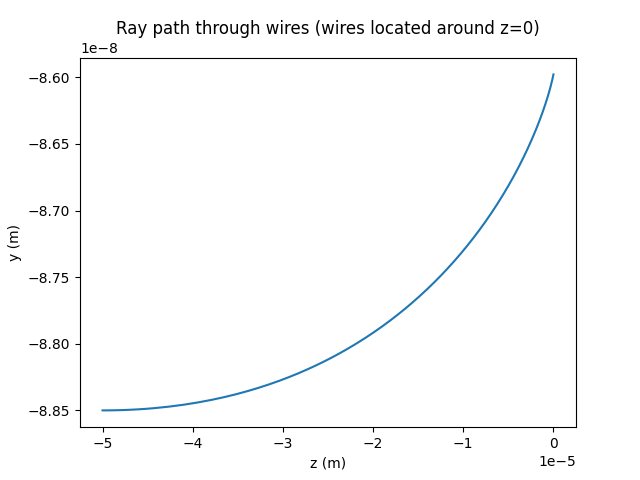

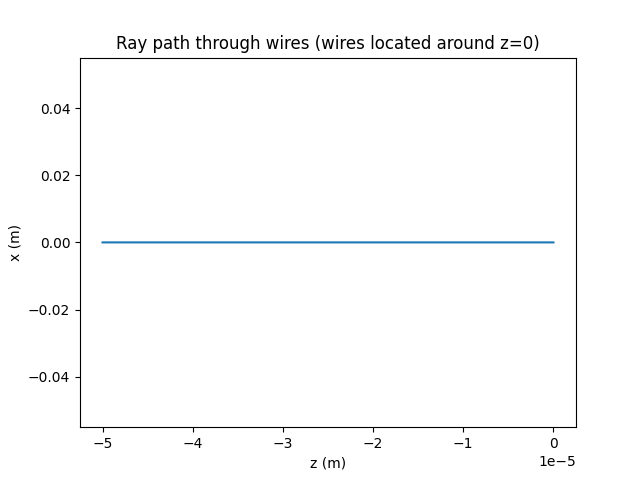

In [31]:
plt.figure()
plt.plot(z_out[:steps], x_out[:steps, 2])
plt.title('Ray path through wires (wires located around z=0)')
plt.xlabel('z (m)')
plt.ylabel('y (m)')

plt.figure()
plt.plot(z_out[:steps], x_out[:steps, 0])
plt.title('Ray path through wires (wires located around z=0)')
plt.xlabel('z (m)')
plt.ylabel('x (m)')

print('X positional deflection (m):', abs(x_out[0, 0]-x_out[steps-1, 0]))
print('Y positional deflection (m):', abs(x_out[0, 2]-x_out[steps-1, 2]))

print('Latitudinal deflection (nm):', np.sqrt(abs(x_out[0, 0]-x_out[steps-1, 0])**2+abs(x_out[0, 2]-x_out[steps-1, 2])**2)/1e-9)

Make a 3D plot with the electron starting at the top and moving downwards (not so visually intuitive right now, The electron looks like it's taking a sharp turn in x, but its just the axes scales. Ignore it for now. 

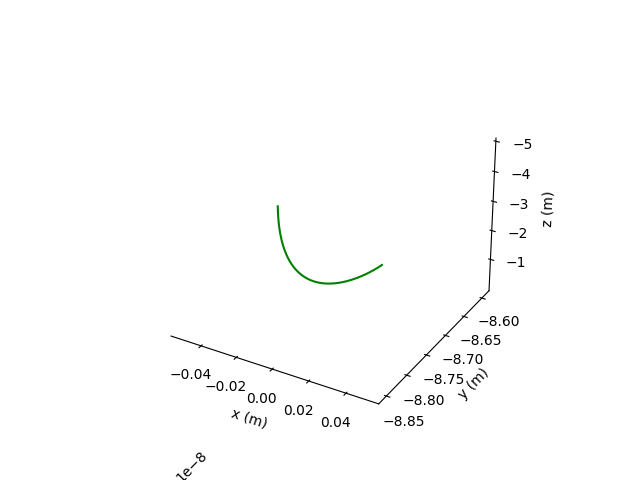

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.invert_zaxis()

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.plot(x_out[:steps-1, 0], x_out[:steps-1, 2], z_out[:steps-1], color =  'g')

Plot the deflection of the electron as seen from plan view. I think the deflection direction is correct, because the electron is negatively charged, and in my model the top wire is positively charged, so the electron should move in the direction of the top wire. Note I had a mistake in this plot earlier as I was indexing one value off what I should have been indexing, thus the end point looked like it was 0,0. I have fixed this, and now you can see that the electron is hardly deflected. 

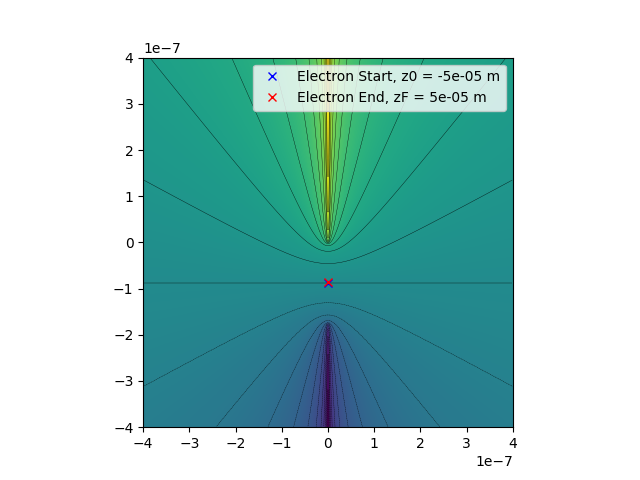

In [33]:
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_wires_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
plan_ax.plot(x_out[0, 0], x_out[0, 2], 'xb', label = f'Electron Start, z0 = {z0} m')
plan_ax.plot(x_out[steps-1, 0], x_out[steps-1, 2], 'xr', label = f'Electron End, zF = {zF} m')
plan_ax.legend()

Plot side view (again hard to visualise what's happening with the electron and the wire at the same time)

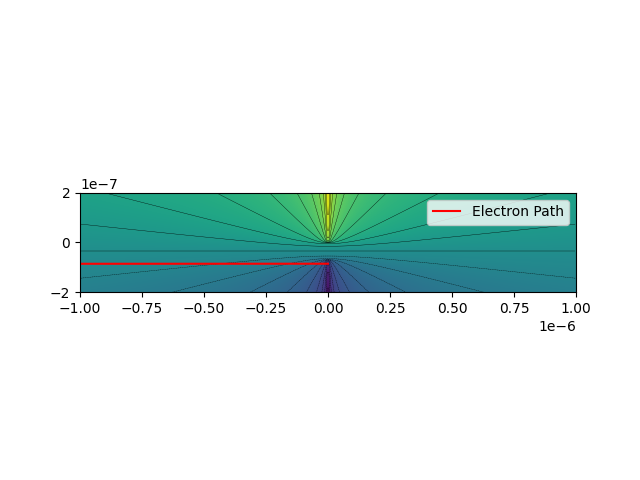

In [34]:
zy_figure, zy_ax = plt.subplots()
z_line, zstep = np.linspace(-1000e-9, 1000e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_grid, z_grid = np.meshgrid(y_line, z_line)
x_grid = 0*np.ones(y_grid.shape)
potential_image = phi_wires_lambda(x_grid, z_grid, y_grid)
zy_ax.imshow(potential_image, extent=[-1000e-9, 1000e-9, -400e-9, 400e-9], origin = 'upper')
zy_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent=[-1000e-9, 1000e-9, -400e-9, 400e-9], origin = 'upper')

zy_ax.plot(z_out[:steps], x_out[:steps, 2], '-r', label = 'Electron Path')
zy_ax.set_xlim(-1000e-9, 1000e-9)
zy_ax.set_ylim(-200e-9, 200e-9)
zy_ax.legend()


Now we need to look at obtaining the phase change in the path of the electron ray. This can be done by beginning with an optical path length $(OPL)$ calculation:

$OPL=\int_{P_0}^{P_1} n(\boldsymbol{r}) d s$

where $n(\boldsymbol{r})$ is the electron optical refractive index. Many textbooks describe the equation for the electron optical refractive index, but I think we wil go with Hawkes' version again (Equation 15.22 in Principle of electron optics, where I have omitted the magnetic vector potential part):

$n(\boldsymbol{r}) =\left[\hat{\Phi}\left(1+y^{\prime 2}+x^{\prime 2}\right)\right]^{1 / 2}$

The OPL equation above is Hamilton's principle https://en.wikipedia.org/wiki/Hamiltonian_optics#Lagrangian_optics. It is also usually the starting point for calculating the aberration integrals of an electron optical system analytically. 

It should in theory be straightforward to calculate the OPL of an electron through this potential, as we just need to calculate the integral above, which we already have the ability to do upon tracing a ray through our system.

Once we have the optical path length, we need to calculate the phase change $\delta$, which should involve this calculation:

$\delta = \frac{2 \pi (OPL_2 - OPL_1)}{\lambda}$

where $OPL_2$ and $OPL_1$ are two optical path lengths. The question I need to answer is where is the reference optical path length that we compare the phase shifted waves to?

It would be useful to also have a reference phase shift to compare our results to, luckily we should have that with the following equation:
$\psi(x,y) = \int_{-\infty}^{\infty} V(x, y, z)$

I think in 1992 G.Pozzi has already solved this analytically for this wire setup: https://www.sciencedirect.com/science/article/pii/030439919290039M but let's see if sympy can do it again anyway with our equation:

Addendum: I can't get sympy to solve this equation at all. Not to worry, It's something to ask Janghyun about. 

In [35]:
###Not sure if this is correct yet at all. It's hard to know as there are no basic examples to compare to###
from scipy.integrate import simpson
def optical_path_length(x, y, x_slope, y_slope, z, phi_hat_lambda, p_0):
    
    deltax, deltay, deltaz = np.diff(x), np.diff(y), np.diff(z) #get the differences between each coordinate
    ds = np.cumsum(np.pad(np.sqrt(deltax**2+deltay**2+deltaz**2), (1, 0), "constant")) #path length calculation, with 0 appended to the start
    p = 1+x_slope**2+y_slope**2
    n = np.sqrt(phi_hat_lambda(x, y, z)*p) #refractive index of electron calculation from hawkes
    p_m = np.sqrt(2*m*abs(e)*phi_hat_lambda(x, y, z))
    n_momentum = p_m/p_0
    opl = simpson(ds, n) #perform numerical integration to obtain OPL. I think this is correct. This should be a stationary point if the ray is a path (dOPL ~ 0)?
    
    return ds, n, opl, n_momentum

phi_hat_0 = (phi_0)*(1+eps*(phi_0))
print(2*m*e)
print(np.sqrt(phi_hat_0))
p_0 = np.sqrt(2*m*abs(e)*phi_hat_0)
s, n, opl, n_momentum = optical_path_length(x_out[:steps, 0], x_out[:steps, 2], x_out[:steps, 1], x_out[:steps, 3], z_out[:steps], phi_hat_lambda, p_0)


-2.9189682724888735e-49
331.33782757837946


-5.916534450493458e-06


Text(0, 0.5, 'n (Refractive Index)')

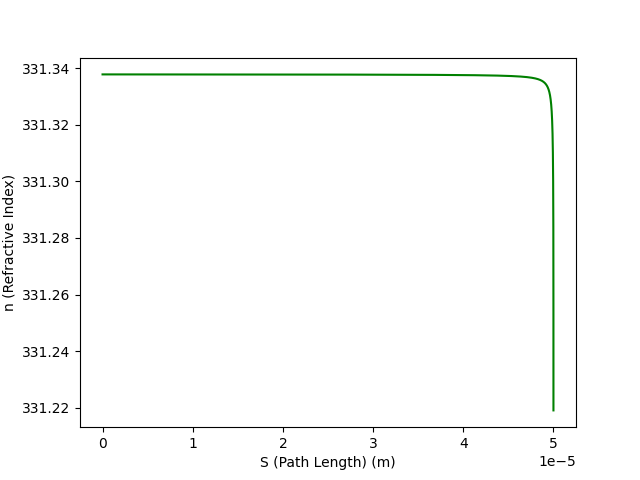

In [36]:
print(opl)

plt.figure()
plt.plot(s, n, '-g')
plt.xlabel('S (Path Length) (m)')
plt.ylabel('n (Refractive Index)')